#gelişmiş fonksiyonel keşifci veri analizi
""" EDA 
elimize gelen büyük veya küçük boyutlardaki verileri ölçeklenebilir yani fonksiyonel tarzda işlenebilmesi,
veriler ile ilgili hızılı bir şekilde içgörüler elde etmeyi amaçlar
"""

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#genel resim
def check_df (dataframe, head = 3):
    print("########## SHAPE ##########")
    print(dataframe.shape)
    print("########## TYPES ##########")
    print(dataframe.dtypes)
    print("########## HEAD ##########")
    print(dataframe.head(head))
    print("########## TAIL ##########")
    print(dataframe.tail(head))  
    print("########## NA ##########")
    print(dataframe.isnull().sum)
    print("########## QUANTILES ##########")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
        
check_df(df)

########## SHAPE ##########
(891, 15)
########## TYPES ##########
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
########## HEAD ##########
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
########## TAIL ##########
     survived 

In [4]:
#KATEGORİK DEĞİŞKEN ANALİZİ 
cat_cols = [col for col in df.columns #tüm sütünlarda gez
            if str(df[col].dtypes) #colun içinde gezerken stringe çevir ve tip bilgisine bak
         in ["category", "object", "bool"]] #ifade bunlardan biri mi
#tip bilgisine göre yakalama
print(cat_cols)

['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [5]:
#bazı değişkenler kategorik olup numerik olarak kodlanabilir, bunları yakalıyalım
#tip bilgisi int veya float olup eşsiz sınıf sayısı belirli bir değerden küçük olan değişkenleri yakala
num_but_cat = [col for col in df.columns 
               if df[col].nunique() < 10 and df[col].dtypes in ["int64" , "float"]]
print(num_but_cat)

['survived', 'pclass', 'sibsp', 'parch']


In [6]:
cat_but_car = [col for col in df.columns 
               if df[col].nunique() > 20 and str(df[col].dtypes) 
               in ["category", "object"]]
#kategorik sınıfta olup eşsiz özellik sayısı açıklanamıyacak kadar çok ise
print(cat_but_car)

[]


In [7]:
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [8]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [9]:
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [10]:
""" kategorik değişken analizimizi fonksiyonlaştıralım.
kendisine girilen değerlerin value_counts() nu alsın : hangi sınıf kaçar tane
sınıfların oran bilgisini alsın : 100 * df["survived"].value_counts() / len(df)
"""
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##############")


In [11]:
cat_summary(df, "class")

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##############


In [12]:
for col in cat_cols:
    cat_summary(df,col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##############
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##############
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##############
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##############
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##############
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##############
     alive      Ratio
no     549  61.616162
yes    342  38.383838
##############
       alone     Ratio
True     537  60.26936
False    354  39.73064
##############
   surviv

In [13]:
#grfik okuma özelliğini ekliyelim
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


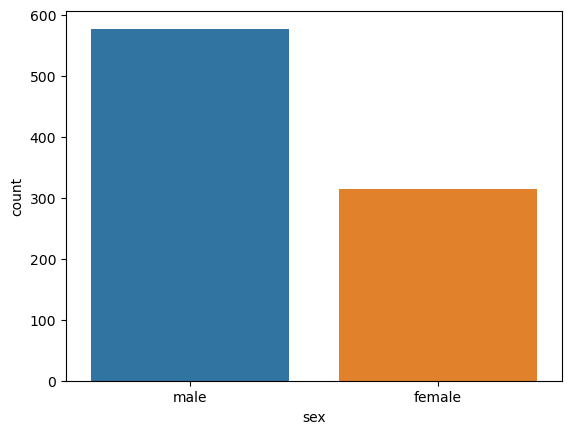

In [14]:
cat_summary(df, "sex", plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


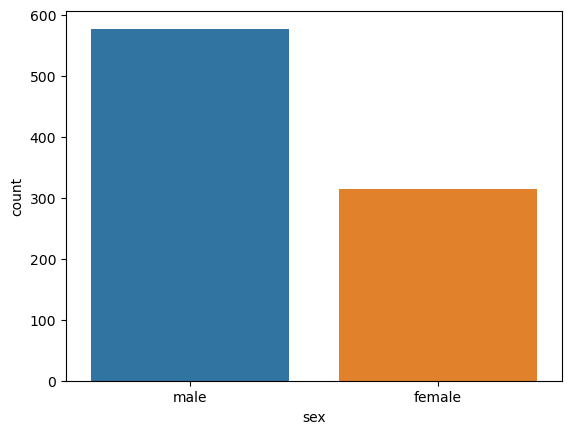

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


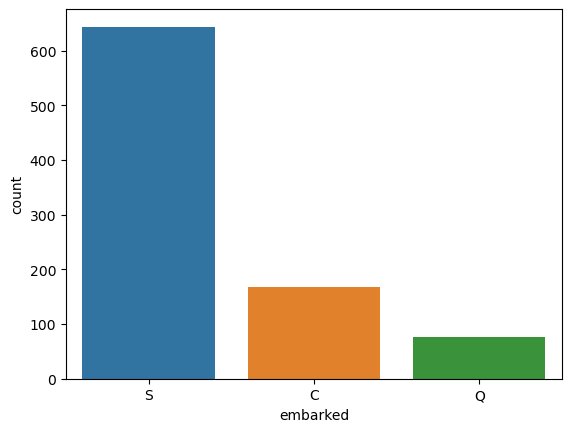

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


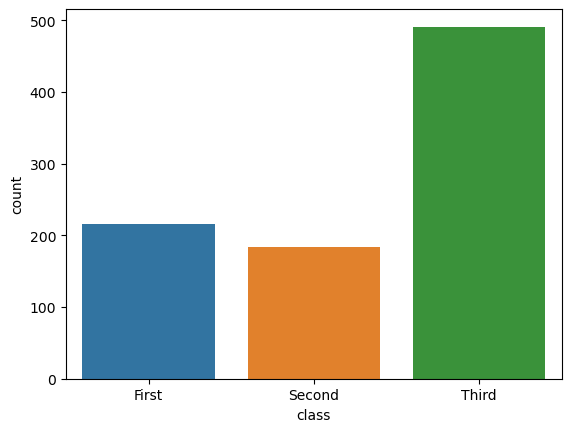

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


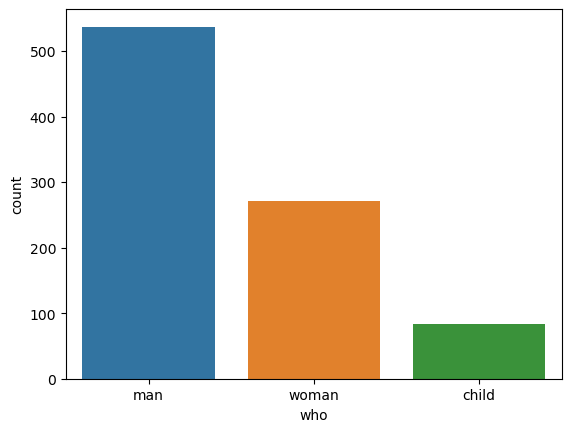

sdfsdfsdfsdfsdfsd
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


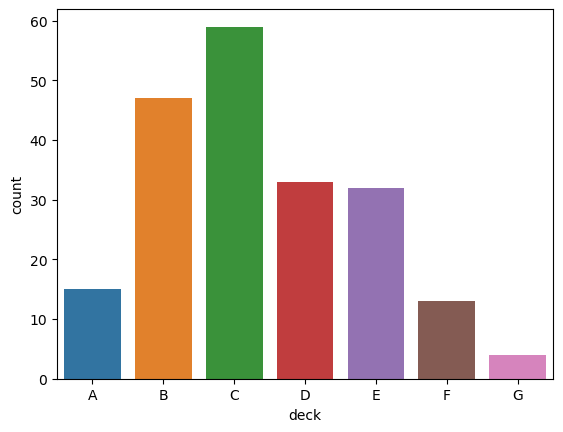

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


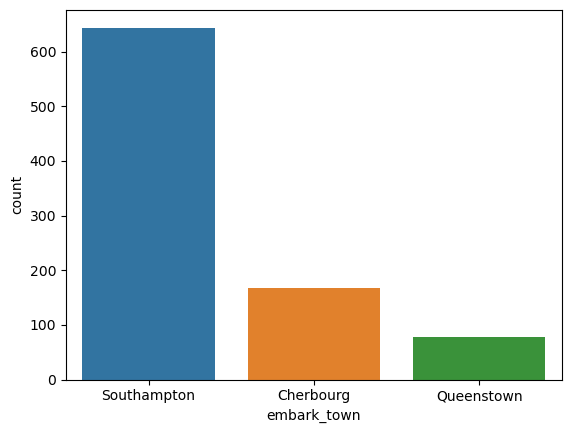

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


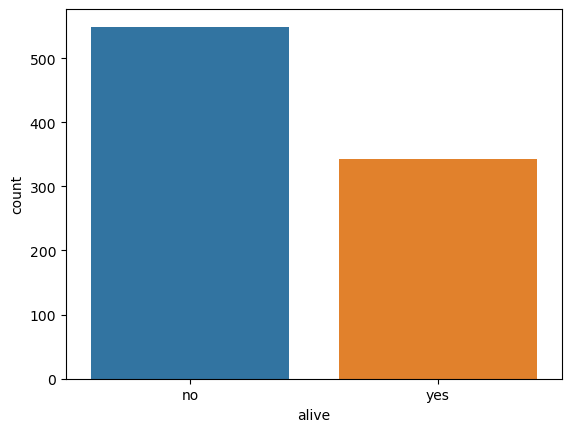

sdfsdfsdfsdfsdfsd
   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


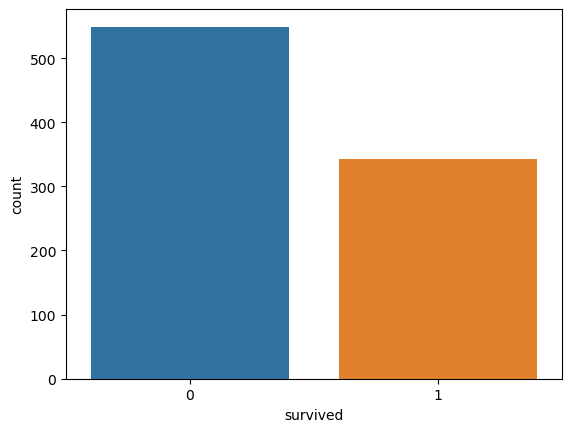

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


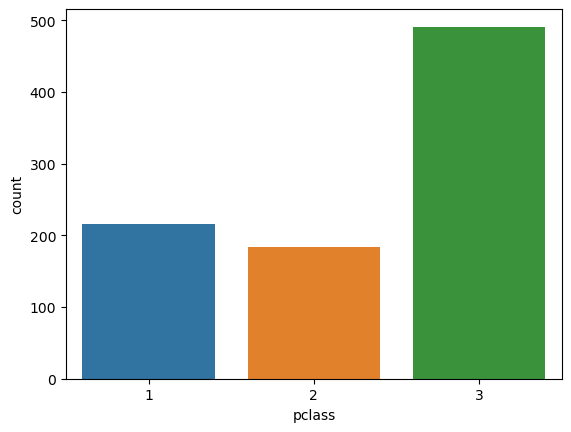

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


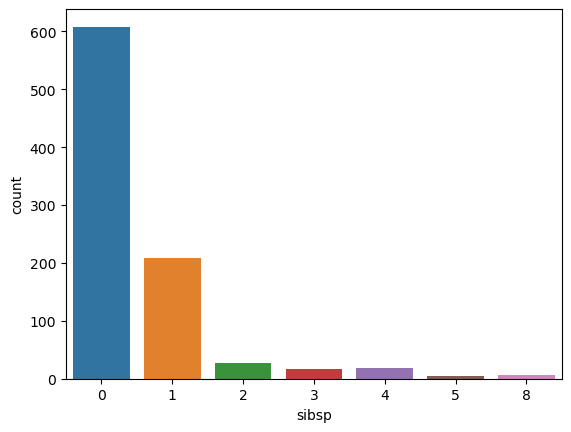

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


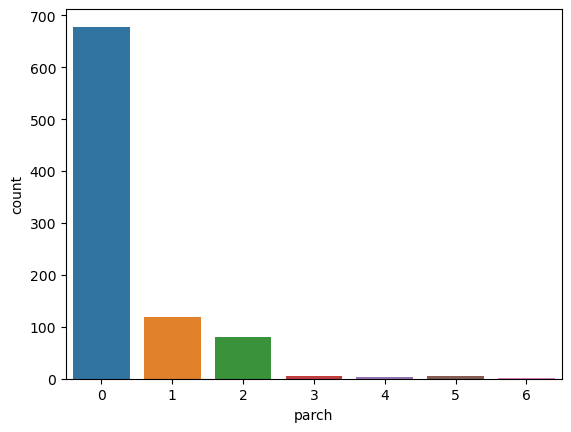

In [15]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print("sdfsdfsdfsdfsdfsd") #bool tipi grafikleşirken hata verir hatayı görmezden gelip nerde bu tip ile karşılaşacağımızı görürüz
    else:
        cat_summary(df, col, plot=True)

In [16]:
df["adult_male"].astype(int) #indexlerin aldığı değerleri gözlemleme true 1, false 0 verir

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int32

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


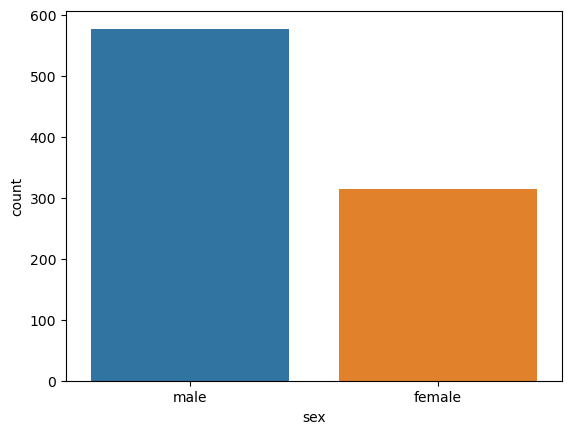

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


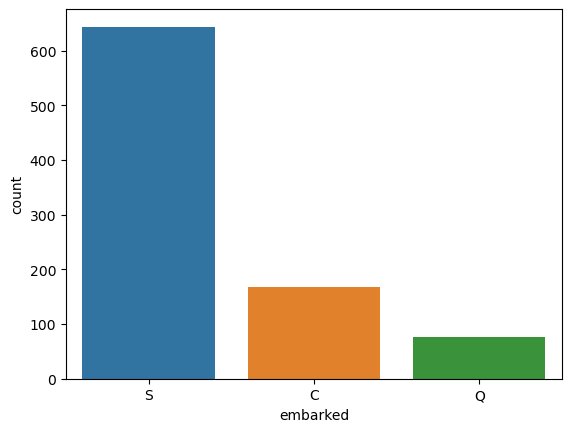

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


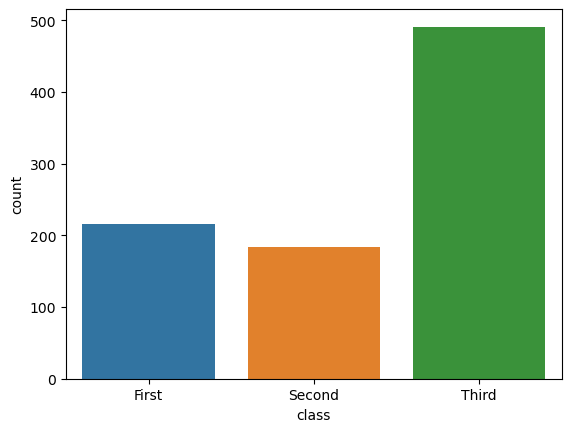

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


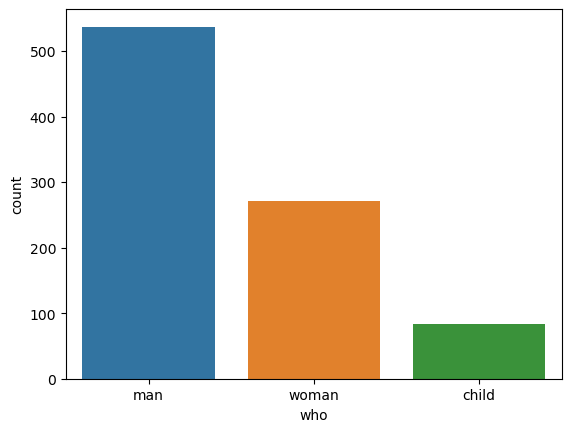

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################


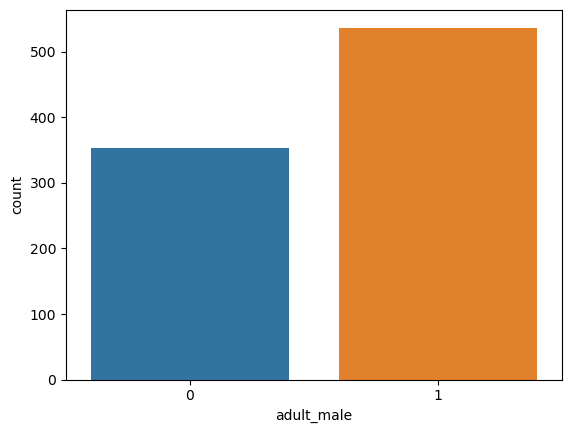

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


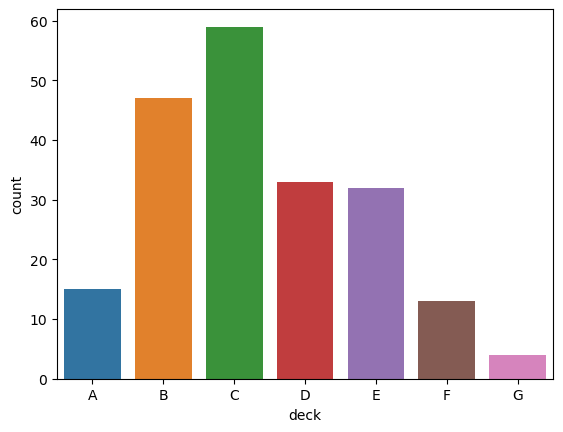

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


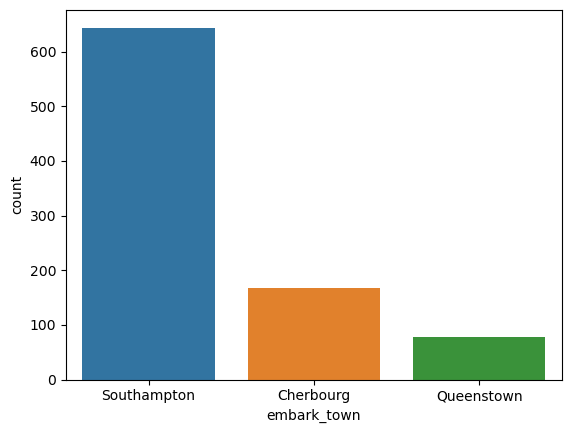

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##########################################


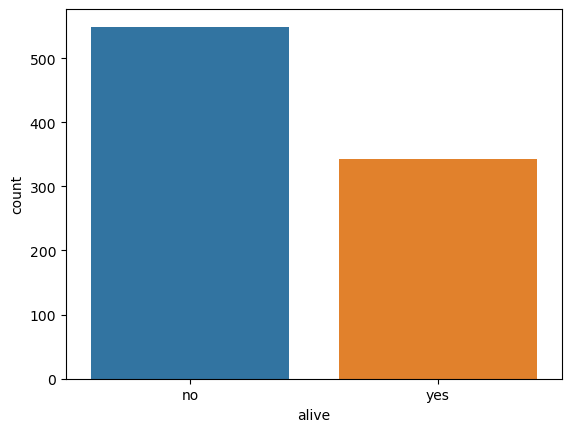

   alone     Ratio
1    537  60.26936
0    354  39.73064
##########################################


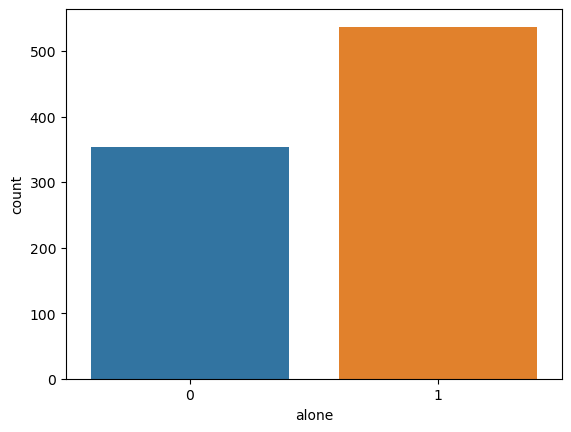

   survived      Ratio
0       549  61.616162
1       342  38.383838
##########################################


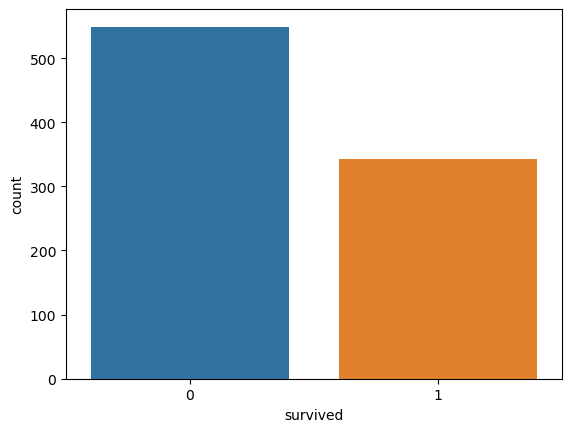

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


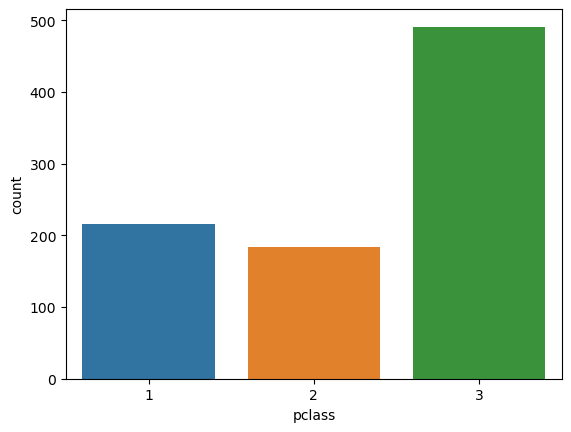

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


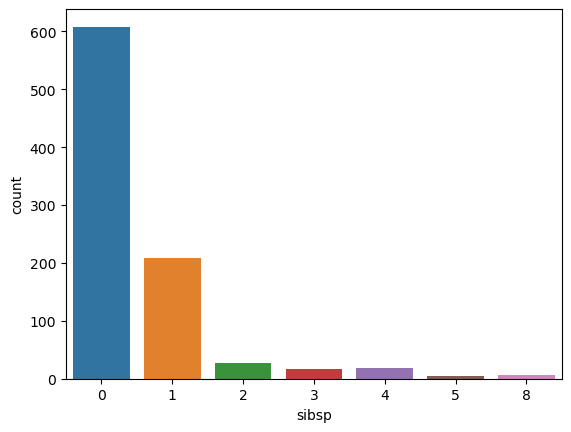

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


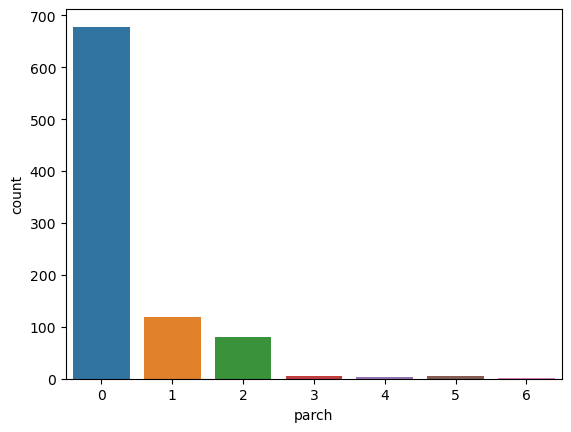

In [17]:
#tip sorgusunu dışarıda yapılıyor
for col in cat_cols:
    if df[col].dtypes == "bool": #bool tipi inte dönüştürdük böylece grafikleştirebiliyoruz artık.
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)

    else:
        cat_summary(df, col, plot=True)

In [19]:
"""tip sorgusunu içeride yapmaya çalışırsak okunabilirlik bozulur.
Büyük ölçekli işlerde mümkün olduğu kadar az ve takip edilebilir ölçekler kulllanmak daha verimlidir.
Yeni özellik eklemek yeni riskler doğurur.
"""